In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import pycaret

In [6]:
import os
arr = os.listdir('./')
print(arr)
#f = arr[len(arr)-1]
f = 'regdata.csv'

['Untitled.ipynb', 'logs.log', 'prices.csv', '._CP210x_VCP_Linux_4.x_Release_Notes.txt', 'SWEETVIZ_REPORT.html', '.ipynb_checkpoints', 'Untitled1.ipynb', 'm5', '._cp210x.c', 'pycaret.ipynb', 'readingFiles.py', '.Rhistory', 'PycaretRegression.ipynb', 'obsidian', 'surveysweetviz.ipynb', '.Rproj.user', 'parquetFiles.py', 'pycaret_test.py', 'regdata.csv', 'GenerateRegressionData.ipynb', 'prices.parquet', 'auto-mpg .csv']


In [13]:
df = pd.read_csv(f)
#drop the name and year columns
#df = df.drop(['name','yr','origin'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
#create a new variable that combines displ, weight and hp and call it heft.
#these are all highly correlated.
## WE DON'T DO AS WELL WITH HEFT.  r2 = .7 vs .8 with separate
#df["heft"] = df.displ/2 + df.hp + df.weight/20
#df = df.drop(['displ','hp','weight'],axis=1)

In [14]:
df.head()

,A,B,C,output
0,30.0,44.0,59.0,23.8
1,57.0,39.0,43.0,24.9
2,61.0,78.0,31.0,24.2
3,28.0,74.0,48.0,24.1
4,74.0,50.0,56.0,26.2


In [ ]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze(df)
my_report.show_html()

In [15]:
from pycaret.regression import *
s = setup(df, target = 'output')

,Description,Value
0,session_id,7793
1,Target,output
2,Original Data,"(100, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 3)"


In [16]:
# evaluate models and compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5302,0.4556,0.6618,0.8974,0.0282,0.0232,0.0610
et,Extra Trees Regressor,0.5226,0.4474,0.6495,0.8925,0.0276,0.0228,0.0410
gbr,Gradient Boosting Regressor,0.5321,0.4681,0.6660,0.8878,0.0275,0.0228,0.0100
dt,Decision Tree Regressor,0.6157,0.5458,0.7289,0.8787,0.0293,0.0260,0.0070
ada,AdaBoost Regressor,0.6380,0.6409,0.7816,0.8427,0.0315,0.0269,0.0190
xgboost,Extreme Gradient Boosting,0.6854,0.8197,0.8896,0.8148,0.0382,0.0302,0.0590
knn,K Neighbors Regressor,0.9711,1.7256,1.2309,0.7016,0.0557,0.0455,0.0070
lightgbm,Light Gradient Boosting Machine,1.4552,3.7358,1.8187,0.4427,0.0799,0.0671,0.0120
huber,Huber Regressor,1.3915,3.7477,1.8076,0.3973,0.0793,0.0655,0.0090
br,Bayesian Ridge,1.4632,3.3905,1.7586,0.3571,0.0758,0.0664,0.0050


In [17]:
lr = create_model(best)
tuned_lr = tune_model(lr)
print(tuned_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4000,0.2514,0.5014,0.8578,0.0196,0.0163
1,0.5772,0.5137,0.7167,0.9428,0.0260,0.0219
2,0.7744,0.8631,0.9291,0.9429,0.0472,0.0393
3,0.9333,1.0352,1.0174,0.4239,0.0406,0.0388
4,0.7690,0.7789,0.8826,0.9193,0.0346,0.0317
5,0.7253,0.6851,0.8277,0.7233,0.0336,0.0309
6,0.8240,0.7738,0.8797,0.9074,0.0348,0.0344
7,0.4952,0.3798,0.6163,0.9675,0.0270,0.0223
8,0.8743,0.8370,0.9149,0.8540,0.0360,0.0363


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=7793, verbose=0, warm_start=False)


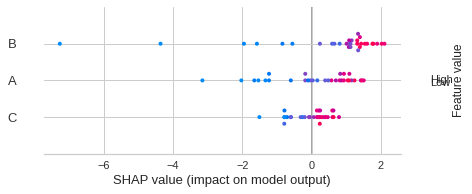

In [18]:
interpret_model(tuned_lr)

In [19]:
#SThe best model does betteas well as the blends with the reduced data 
predictions = predict_model(tuned_lr, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3260,0.2120,0.4604,0.9724,0.0189,0.0140


,A,B,C,output,Label
0,30.0,44.0,59.0,23.8,23.700000
1,57.0,39.0,43.0,24.9,25.066666
2,61.0,78.0,31.0,24.2,24.400001
3,28.0,74.0,48.0,24.1,23.700000
4,74.0,50.0,56.0,26.2,26.300000


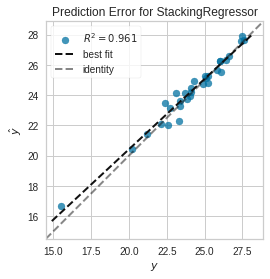

In [26]:
plot_model(tuned_stacker,plot = 'error')

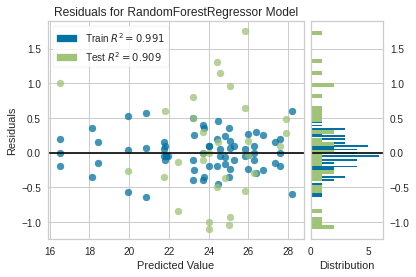

In [21]:
plot_model(tuned_lr, plot = 'residuals')

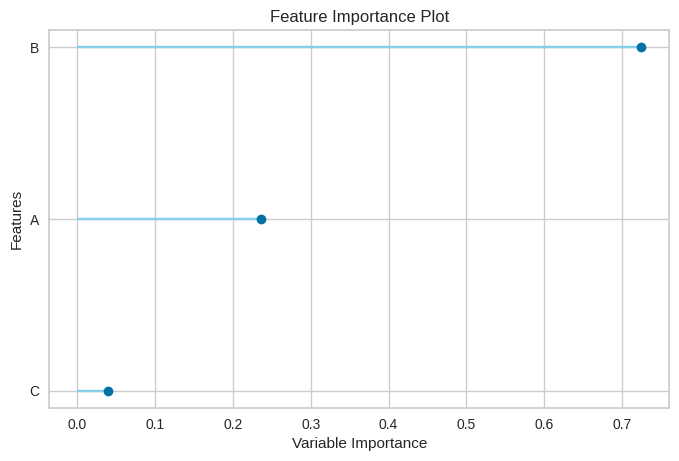

In [22]:
#using lr model to get feature importance.  The blended models make that impossible.
plot_model(tuned_lr,plot = 'feature')

In [ ]:
cyl = df.groupby('cyl').mean('mpg')
ax = sns.barplot(x=cyl.index,y="mpg", data=cyl).set(
                 title = "4 or 5 cylinder cars have the highest mileage, 8 cylinders is the worst")

In [14]:
bagged_lr = ensemble_model(tuned_lr, method = 'Bagging')
tuned_bag = tune_model(bagged_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8609,18.1710,4.2627,0.7742,0.1352,0.1058
1,3.1462,16.6912,4.0855,0.7953,0.1551,0.1285
2,1.7682,5.3117,2.3047,0.8943,0.1031,0.0912
3,2.3241,8.6753,2.9454,0.8130,0.1260,0.1125
4,3.2403,23.8042,4.8790,0.4937,0.1849,0.1282
5,2.0052,6.5685,2.5629,0.8836,0.0930,0.0816
6,2.7089,15.3924,3.9233,0.7295,0.1422,0.1068
7,2.7861,17.6173,4.1973,0.7595,0.1364,0.0995
8,2.4904,9.4919,3.0809,0.7994,0.1352,0.1186


In [23]:
top3 = compare_models(n_select = 3)
blender = blend_models(top3)
stacker = stack_models(top3)
tuned_blender = tune_model(blender) 
tuned_stacker = tune_model(stacker)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5490,0.6394,0.7996,0.6383,0.0333,0.0227
1,0.4003,0.2420,0.4920,0.9730,0.0219,0.0173
2,0.3776,0.2363,0.4861,0.9844,0.0221,0.0179
3,0.4033,0.2781,0.5273,0.8452,0.0212,0.0169
4,0.4899,0.3724,0.6103,0.9614,0.0241,0.0205
5,0.7907,0.7572,0.8702,0.6941,0.0364,0.0339
6,0.5027,0.3076,0.5546,0.9632,0.0218,0.0208
7,0.3950,0.2535,0.5035,0.9783,0.0224,0.0182
8,0.6079,0.4478,0.6692,0.9219,0.0290,0.0265
